<a href="https://colab.research.google.com/github/sstamatatos/sstamatatos.github.io/blob/master/SebDaddy_%F0%9F%A4%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Initial Import Libararies
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
# Parameters:
tickerID = "MSFT" #@param {type:"string"}
startDate = "2000-01-01" #@param {type:"date"}

# Get Desired Stock Data
rawdf = web.DataReader(tickerID, data_source='yahoo', start=startDate)

# Show the data
rawdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,59.312500,56.000000,58.687500,58.281250,53228400.0,37.495686
2000-01-04,58.562500,56.125000,56.781250,56.312500,54119000.0,36.229057
2000-01-05,58.187500,54.687500,55.562500,56.906250,64059600.0,36.611080
2000-01-06,56.937500,54.187500,56.093750,55.000000,54976600.0,35.384666
2000-01-07,56.125000,53.656250,54.312500,55.718750,62013600.0,35.847076
...,...,...,...,...,...,...
2020-02-11,190.699997,183.500000,190.649994,184.440002,53159900.0,184.440002
2020-02-12,185.850006,181.850006,185.580002,184.710007,47062900.0,184.710007
2020-02-13,186.229996,182.869995,183.080002,183.710007,35295800.0,183.710007


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


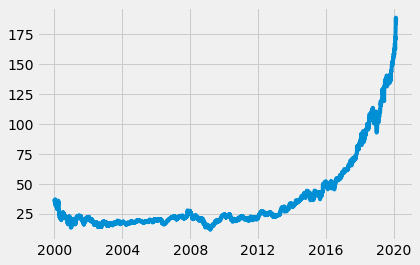

In [3]:
# Visualize Raw Adj Close Data
plt.plot(rawdf['Adj Close'])
plt.show()

In [4]:
# Drop Close Column
rawdf = rawdf.drop(columns='Close')

#Show Raw Data
rawdf

,High,Low,Open,Volume,Adj Close
Date,,,,,
2000-01-03,59.312500,56.000000,58.687500,53228400.0,37.495686
2000-01-04,58.562500,56.125000,56.781250,54119000.0,36.229057
2000-01-05,58.187500,54.687500,55.562500,64059600.0,36.611080
2000-01-06,56.937500,54.187500,56.093750,54976600.0,35.384666
2000-01-07,56.125000,53.656250,54.312500,62013600.0,35.847076
...,...,...,...,...,...
2020-02-11,190.699997,183.500000,190.649994,53159900.0,184.440002
2020-02-12,185.850006,181.850006,185.580002,47062900.0,184.710007
2020-02-13,186.229996,182.869995,183.080002,35295800.0,183.710007


In [5]:
# Convert to numpy array
data = np.array(rawdf)

# Show Data
data

array([[5.93125000e+01, 5.60000000e+01, 5.86875000e+01, 5.32284000e+07,
        3.74956856e+01],
       [5.85625000e+01, 5.61250000e+01, 5.67812500e+01, 5.41190000e+07,
        3.62290573e+01],
       [5.81875000e+01, 5.46875000e+01, 5.55625000e+01, 6.40596000e+07,
        3.66110802e+01],
       ...,
       [1.86229996e+02, 1.82869995e+02, 1.83080002e+02, 3.52958000e+07,
        1.83710007e+02],
       [1.85410004e+02, 1.82649994e+02, 1.83250000e+02, 2.31495000e+07,
        1.85350006e+02],
       [1.87699997e+02, 1.85500000e+02, 1.85610001e+02, 2.77922000e+07,
        1.87229996e+02]])

In [6]:
# Split the Data into X and Y
x_data = data[:, :4]
y_data = data[:, 4]

x_data, y_data

(array([[5.93125000e+01, 5.60000000e+01, 5.86875000e+01, 5.32284000e+07],
        [5.85625000e+01, 5.61250000e+01, 5.67812500e+01, 5.41190000e+07],
        [5.81875000e+01, 5.46875000e+01, 5.55625000e+01, 6.40596000e+07],
        ...,
        [1.86229996e+02, 1.82869995e+02, 1.83080002e+02, 3.52958000e+07],
        [1.85410004e+02, 1.82649994e+02, 1.83250000e+02, 2.31495000e+07],
        [1.87699997e+02, 1.85500000e+02, 1.85610001e+02, 2.77922000e+07]]),
 array([ 37.49568558,  36.22905731,  36.61108017, ..., 183.71000671,
        185.3500061 , 187.22999573]))

In [7]:
# Reshape Y Data
y_data = np.reshape(y_data, (y_data.shape[0], 1))

y_data.shape

(5063, 1)

In [8]:
# Scale the Data
xscaler = MinMaxScaler(feature_range=(0, 1))
yscaler = MinMaxScaler(feature_range=(0, 1))

x_data_scaled = xscaler.fit_transform(x_data)
y_data_scaled = yscaler.fit_transform(y_data)

x_data_scaled, y_data_scaled

(array([[0.24955735, 0.24104788, 0.24786265, 0.07847963],
        [0.24527359, 0.24178046, 0.23699773, 0.08000561],
        [0.24313172, 0.2333558 , 0.23005131, 0.09703807],
        ...,
        [0.97446881, 0.9845865 , 0.95685385, 0.04775348],
        [0.96978528, 0.98329716, 0.95782277, 0.02694171],
        [0.98286498, 1.        , 0.9712739 , 0.03489663]]),
 array([[0.14558775],
        [0.1384304 ],
        [0.1405891 ],
        ...,
        [0.97180299],
        [0.98107016],
        [0.99169344]]))

In [0]:
# Parameters
numDays =  15#@param {type:"integer"}

In [10]:
# Create X and Y Train Data
x_train = x_data_scaled[:x_data_scaled.shape[0] - numDays]
y_train = y_data_scaled[numDays:]

x_train.shape, y_train.shape

((5048, 4), (5048, 1))

In [11]:
# Reshape X Data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(5048, 4, 1)

In [12]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 
                                                       x_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
# Reshape Scaled Data
x_data_scaled = np.reshape(x_data_scaled, (x_data_scaled.shape[0], x_data_scaled.shape[1], 1))
y_data_scaled = np.reshape(y_data_scaled, (y_data_scaled.shape[0], 1))

In [0]:
# Train the model
history = model.fit(x=x_train, y=y_train, validation_data=(x_data_scaled[:x_data_scaled.shape[0] - numDays], y_data_scaled[numDays:]), batch_size=50, epochs=numDays*4, shuffle=False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5048 samples, validate on 5048 samples
Epoch 1/60





5048/5048 [==============================] - 4s 716us/step - loss: 6.2708e-04 - val_loss: 0.1187
Epoch 2/60
5048/5048 [==============================] - 2s 339us/step - loss: 0.0070 - val_loss: 0.2538
Epoch 3/60
5048/5048 [==============================] - 2s 325us/step - loss: 0.0157 - val_loss: 0.4171
Epoch 4/60
5048/5048 [==============================] - 2s 347us/step - loss: 0.0359 - val_loss: 0.0966
Epoch 5/60
5048/5048 [==============================] - 2s 335us/step - loss: 0.0326 - val_loss: 0.0460
Epoch 6/60
5048/5048 [==============================] - 2s 347us/step - loss: 0.0118 - val_loss: 0.0285
Epoch 7/60
5048/5048 [==============================] - 2s 343us/step - loss: 0.0045 - val_loss: 0.0084
Epoch 8/60
5048/5048 [==============================] - 2s 348us/step - loss: 0.0028 - val_loss: 0.0231
Epoch 9/60
504

In [0]:
# Get Forecast Values
xforecast = x_data_scaled[x_data_scaled.shape[0] - numDays:]
xforecast = np.reshape(xforecast, (xforecast.shape[0], xforecast.shape[1], 1))

# Get Forecast
forecast = model.predict(xforecast)
forecast = yscaler.inverse_transform(forecast)

In [0]:
# Visualize Forecast
plt.plot(forecast)
plt.show()